In [3]:
import numpy as np   #manejo de vectores
import math as mt    #calculos matematicos y constantes
import sympy as sp   #calculo simbolico
import matplotlib. pyplot as plt  #graficos
from scipy.special import factorial
#from funciones.potencial import U, FU

#import statistics as st    #calculos estadisticos

In [4]:
#parametros del potencial V
C, V_0, x_0 = -1.1, 1/(2*mt.pi), -0.19

#estableciendo el potencial V
X =sp.symbols('X')
expr1 = V_0*(sp.sin(2*sp.pi*(X-x_0)) +1/4 *sp.sin(4*sp.pi*(X-x_0))) #potencial V
expr2=sp.diff(expr1,X)   

#haciendo que V tome como argumentos vectores
V =sp.lambdify(X, expr1)
V_vector =np.vectorize(V)
Vdiff = sp.lambdify(X,expr2)
Vdiff_vector =np.vectorize(Vdiff)

#estableciendo el potencial efectivo U=V-F*x
def U(x,a,F,fact):  # a=0: V=0, a=1: V   ,fact:cambiar el periodo
    return a*V_vector(x*fact)-F*x
U_vector = np.vectorize(U)
#fuerza correspondiente de U
def FU(x,a,F,fact):   
    if a==0:
        return F
    return -a*Vdiff_vector(x*fact)+F
FU_vector = np.vectorize(FU,excluded=['a','F'])

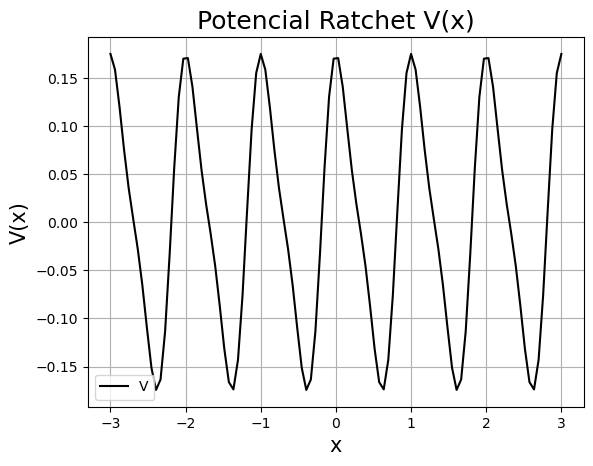

In [5]:
x=np.linspace(-3,3,100)
plt.plot(x,U_vector(x,1,0,1),label='V',color='black') #potencial V
plt.ylabel("V(x)",fontsize = 15)
plt.xlabel("x",fontsize = 15)
plt.grid()
plt.title('Potencial Ratchet V(x)',size=18)
plt.legend()
#save_fig('potencial_V', tight_layout=True, fig_extension="png", resolution=300)

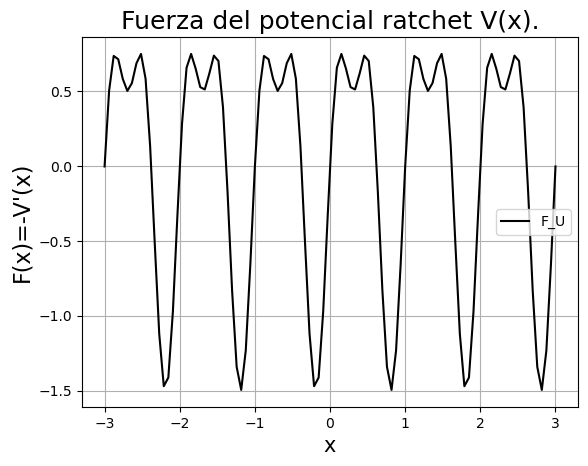

In [6]:
plt.plot(x,FU_vector(x,1,0,1),label='F_U',color='black') #fuerza F
plt.ylabel("F(x)=-V'(x)",fontsize = 16)
plt.xlabel("x",fontsize = 15)
plt.grid()
plt.title('Fuerza del potencial ratchet V(x).',size=18)
plt.legend()

#save_fig('fuerza_ratchet', tight_layout=True, fig_extension="png", resolution=300)

In [14]:
'''
PARMETROS:
a: considerar potencial si=1,no=0
F: modulo de la fuerza constante
D: coeficiente de difusion
dt: tiempo de paso
t: tiempo
on_off: semiperiodo del tiempo y apagado
parpadeo: si=True ,no=False
dN: cada cuantos pasos se almacenan los datos
''' 
def simulacion(a,F,num_particulas,D,dt,t,on_off,parpadeo,dN,fact):
    N=int(t/dt)   #N: numero de pasos 
    dN_2=int(on_off/dt)  #numero de pasos que se dan en el tiempo de  encendido o apagado
    X=np.zeros(num_particulas)  #vector que almacena las posiciones de N particulas
    X_old=np.zeros(num_particulas)  #posicion inicial de las particulas = 0
    
    #listas donde se almacenara los promedio de las mediciones
    posicion=[]
    POSICIONES=[]
    posicion_2=[]
    tiempo=[]
    velocidad=[]
    
    #condicion inicial de las mediciones
    posicion.append(0)
    posicion_2.append(0)
    tiempo.append(0)
    POSICIONES.append(np.zeros(num_particulas))
    velocidad.append(0)
    
    tau_list=[] #comprobando el encendido 1 y apagado 0
    tau_list.append(a) 
    
    for i in range(1,N):
        
        #encendido y apagado
        if parpadeo == True: #aqui es donde se apaga(a=0) y prende(a=1)
            if i%dN_2==0:
                if a==0:
                    a=1
                else: a=0
        
            
        t=t+dt*i #contabilizando el tiempo
        
        #realizacion del siguiente paso
        X = X + dt*FU_vector(X,a,F,fact)+ np.sqrt(2*D*dt)*np.random.normal(0,1,num_particulas)
        
        #despues de cada dN pasos se almacenan los datos
        if (i%dN) == 0:
            #salidas
            #eliminar el comando de comentario '#' de acuerdo a que variable desea medir 
            tiempo.append(i*dt)
            posicion.append(np.mean(X)) 
            POSICIONES.append(X)      
            #posicion_2.append(np.mean(X*X))    
            velocidad.append(np.mean((X-X_old)/(dN*dt)))   
            X_old=X   
            #tau_list.append(a)
            
    return  tiempo,posicion, velocidad #colocar las variables a los cuales elimino el #''


In [15]:
tiempo,x, v=simulacion(a=0,F=0,
                       num_particulas=2,
                       D=0.1,
                       dt=0.00005,
                       t=10,
                       on_off=0.00005*1000,
                       parpadeo=False,
                       dN=1000,
                       fact=1)

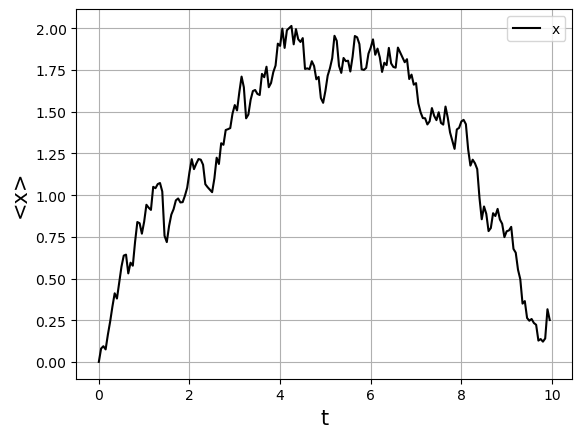

In [16]:
#graficando tiempo vs posicion
plt.plot(tiempo,x,label='x',color='black')
plt.xlabel("t",fontsize = 15)
plt.ylabel('<x>',fontsize = 15)
plt.grid()
#plt.ylim((-0.2,0.2))
#plt.title('<x> de 1000 partículas.',size=18)
plt.legend(fontsize=10)
#save_fig('wiener_posicion', tight_layout=True, fig_extension="png", resolution=300)

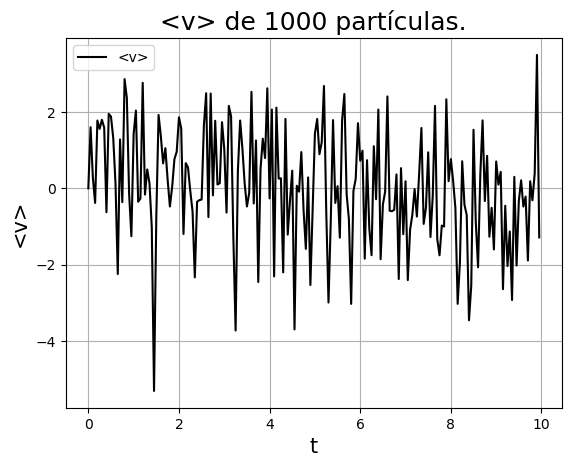

In [18]:
#graficando tiempo vs velocidad
plt.plot(tiempo,v,label='<v>',color='black') #potencial U con F_n=-1
plt.xlabel("t",fontsize = 15)
plt.ylabel('<v>',fontsize = 15)
plt.grid()

plt.title('<v> de 1000 partículas.',size=18)
plt.legend(fontsize=10) 
#save_fig('wiener_velocidad', tight_layout=True, fig_extension="png", resolution=300)